### Steps to building your deep learning model

**1. Load data and understand the problem to be solved:** Plot data, is it balanced, do you have enough data, do you need image augmentation, is it large data that doesn't fit memory, etc.

**2. Cleanup and preprocess data:** Remove null for structured data, extract features if not provided, select/drop appropriate features, balance classes, scale/normalize data, etc.

**3. Get data ready for training:** Reshape data and define X_train, X_test, X_val, y_train, y_test, y_val, define augmentation

**4. Define the model:** How many layers, appropriate activation functions, do you need to add dropout, appropriate optimizer, loss, metrics, use transfer learning?

**5. Train the model:** Ensure enough validation data for good accuracy checks during training.

**6. Re-train, if necessary:** Check accuracy on test data, understand learning curves and continue training the model, if needed.

**7. Save the model for future use:**  





In [2]:
"""

Dataset information:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
## 'data.frame':    569 obs. of  31 variables:
##  $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...
##  $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
##  $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
##  $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
##  $ area_mean              : num  1001 1326 1203 386 1297 ...
##  $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
##  $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
##  $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
##  $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
##  $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
##  $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
##  $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
##  $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
##  $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
##  $ area_se                : num  153.4 74.1 94 27.2 94.4 ...
##  $ smoothness_se          : num  0.0064 0.00522 0.00615 0.00911 0.01149 ...
##  $ compactness_se         : num  0.049 0.0131 0.0401 0.0746 0.0246 ...
##  $ concavity_se           : num  0.0537 0.0186 0.0383 0.0566 0.0569 ...
##  $ concave.points_se      : num  0.0159 0.0134 0.0206 0.0187 0.0188 ...
##  $ symmetry_se            : num  0.03 0.0139 0.0225 0.0596 0.0176 ...
##  $ fractal_dimension_se   : num  0.00619 0.00353 0.00457 0.00921 0.00511 ...
##  $ radius_worst           : num  25.4 25 23.6 14.9 22.5 ...
##  $ texture_worst          : num  17.3 23.4 25.5 26.5 16.7 ...
##  $ perimeter_worst        : num  184.6 158.8 152.5 98.9 152.2 ...
##  $ area_worst             : num  2019 1956 1709 568 1575 ...
##  $ smoothness_worst       : num  0.162 0.124 0.144 0.21 0.137 ...
##  $ compactness_worst      : num  0.666 0.187 0.424 0.866 0.205 ...
##  $ concavity_worst        : num  0.712 0.242 0.45 0.687 0.4 ...
##  $ concave.points_worst   : num  0.265 0.186 0.243 0.258 0.163 ...
##  $ symmetry_worst         : num  0.46 0.275 0.361 0.664 0.236 ...
##  $ fractal_dimension_worst: num  0.1189 0.089 0.0876 0.173 0.0768 ...

"""

'\n\nDataset information:\nhttps://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)\n## \'data.frame\':    569 obs. of  31 variables:\n##  $ diagnosis              : Factor w/ 2 levels "Benign","Malignant": 2 2 2 2 2 2 2 2 2 2 ...\n##  $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...\n##  $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...\n##  $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...\n##  $ area_mean              : num  1001 1326 1203 386 1297 ...\n##  $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...\n##  $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...\n##  $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...\n##  $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...\n##  $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...\n##  $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...\n##  $ radius_se              : num  1.

**1. Load data and understand the problem to be solved:** Plot data, is it balanced, do you have enough data, do you need image augmentation, is it large data that doesn't fit memory, etc.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("breast_cancer_data.csv")

In [3]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [4]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

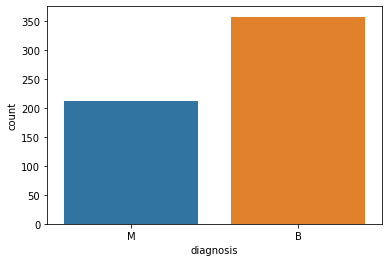

In [5]:
#Understand the data
sns.countplot(x="diagnosis", data=df) #M - malignant   B - benign

In [ ]:
fig, ax =plt.subplots(1,3, figsize=(15, 5))
sns.histplot(df['radius_mean'], ax=ax[0])
sns.histplot(df['area_mean'], ax=ax[1])
sns.histplot(df['smoothness_se'], ax=ax[2])

fig.show()

In [ ]:
#Look for strong correlations so you can drop certain highly correlated features.
fig, ax =plt.subplots(2,3, figsize=(15, 10))
sns.lineplot(x=df['radius_mean'], y=df['perimeter_mean'], ax=ax[0,0])
sns.lineplot(x=df['radius_mean'], y=df['area_mean'], ax=ax[0,1])
sns.lineplot(x=df['radius_mean'], y=df['smoothness_mean'], ax=ax[0,2])
sns.lineplot(x=df['radius_mean'], y=df['compactness_mean'], ax=ax[1,0])
sns.lineplot(x=df['radius_mean'], y=df['concavity_mean'], ax=ax[1,1])
sns.lineplot(x=df['radius_mean'], y=df['symmetry_mean'], ax=ax[1,2])

fig.show()

In [8]:
corr = df.corr()
corr_unstacked = corr.unstack()
corr_unstacked_sorted = corr_unstacked.sort_values(kind="quicksort", ascending=False)
corr_df=pd.Series.to_frame(corr_unstacked_sorted, name='correlation')  #Convert Series to DataFrame and name correlation column accordingly.
high_corr_features =  corr_df[corr_df.correlation != 1]  #Remove all 1s that correspond to self correlation
print(high_corr_features.head(30))

                                 correlation
radius_mean     perimeter_mean      0.997855
perimeter_mean  radius_mean         0.997855
radius_worst    perimeter_worst     0.993708
perimeter_worst radius_worst        0.993708
area_mean       radius_mean         0.987357
radius_mean     area_mean           0.987357
area_mean       perimeter_mean      0.986507
perimeter_mean  area_mean           0.986507
area_worst      radius_worst        0.984015
radius_worst    area_worst          0.984015
area_worst      perimeter_worst     0.977578
perimeter_worst area_worst          0.977578
radius_se       perimeter_se        0.972794
perimeter_se    radius_se           0.972794
perimeter_mean  perimeter_worst     0.970387
perimeter_worst perimeter_mean      0.970387
radius_worst    radius_mean         0.969539
radius_mean     radius_worst        0.969539
perimeter_mean  radius_worst        0.969476
radius_worst    perimeter_mean      0.969476
perimeter_worst radius_mean         0.965137
radius_mea

**2. Cleanup and preprocess data:** Remove null for structured data, extract features if not provided, select/drop appropriate features, balance classes, scale/normalize data, etc.

In [9]:
#Drop features that are highly correlated with another feature.
#In this case, let us just use Radius and drop area & perimeter.
cols = [c for c in df.columns if c.lower()[:4] != 'area']  #Drop all column names starting with 'area'
df=df[cols]  #Update the dataframe with new columns
cols = [c for c in df.columns if c.lower()[:9] != 'perimeter'] #Drop all column names starting with 'perimeter'
df=df[cols]  #Update the dataframe with new columns
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [10]:
print(df.isnull().sum())
#df = df.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
#Rename Dataset to Label to make it easy to understand
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
dtype: object


In [12]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  B    357
M    212
Name: Label, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [13]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)
print(X.describe().T) #Needs scaling

                         count       mean       std        min        25%  \
radius_mean              569.0  14.127292  3.524049   6.981000  11.700000   
texture_mean             569.0  19.289649  4.301036   9.710000  16.170000   
smoothness_mean          569.0   0.096360  0.014064   0.052630   0.086370   
compactness_mean         569.0   0.104341  0.052813   0.019380   0.064920   
concavity_mean           569.0   0.088799  0.079720   0.000000   0.029560   
concave points_mean      569.0   0.048919  0.038803   0.000000   0.020310   
symmetry_mean            569.0   0.181162  0.027414   0.106000   0.161900   
fractal_dimension_mean   569.0   0.062798  0.007060   0.049960   0.057700   
radius_se                569.0   0.405172  0.277313   0.111500   0.232400   
texture_se               569.0   1.216853  0.551648   0.360200   0.833900   
smoothness_se            569.0   0.007041  0.003003   0.001713   0.005169   
compactness_se           569.0   0.025478  0.017908   0.002252   0.013080   

In [14]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.59375282 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.28987993 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.51430893 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.28816467 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.58833619 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.         ... 0.         0.25744136 0.10068215]]


**3. Get data ready for training:** Reshape data and define X_train, X_test, X_val, y_train, y_test, y_val, define augmentation

In [15]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 24)
Shape of testing data is:  (143, 24)


**4. Define the model:** How many layers, appropriate activation functions, do you need to add dropout, appropriate optimizer, loss, metrics, use transfer learning?

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [17]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                400       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
None


**5. Train the model:** Ensure enough validation data for good accuracy checks during training.

In [18]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#Overwrite the model each time accuracy improves. Saves a lot of space.
filepath="best_model.hdf5" #File name includes epoch and validation accuracy.
#filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

csv_logger = CSVLogger('training.log.csv')

#This callback will stop the training when there is no improvement in the validation loss for five consecutive epochs.
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

callbacks_list = [checkpoint, early_stop, csv_logger]

In [19]:
#Fit with early stopping (and other) callback.
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=30,
                    validation_data=(X_test, y_test), callbacks=callbacks_list)


Epoch 1/100
15/15 [==============================] - 1s 14ms/step - loss: 0.7030 - accuracy: 0.6033 - val_loss: 0.6899 - val_accuracy: 0.6154

Epoch 00001: val_accuracy improved from -inf to 0.61538, saving model to best_model.hdf5
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6852 - accuracy: 0.6174 - val_loss: 0.6708 - val_accuracy: 0.6224

Epoch 00002: val_accuracy improved from 0.61538 to 0.62238, saving model to best_model.hdf5
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6526 - val_loss: 0.6541 - val_accuracy: 0.6364

Epoch 00003: val_accuracy improved from 0.62238 to 0.63636, saving model to best_model.hdf5
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6512 - accuracy: 0.6808 - val_loss: 0.6383 - val_accuracy: 0.6713

Epoch 00004: val_accuracy improved from 0.63636 to 0.67133, saving model to best_model.hdf5
Epoch 5/100
15/15 [==============================] - 0s 4ms/step -

**6. Re-train, if necessary:** Check accuracy on test data, understand learning curves and continue training the model, if needed.

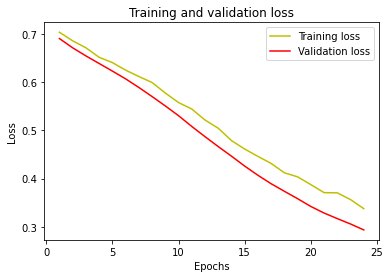

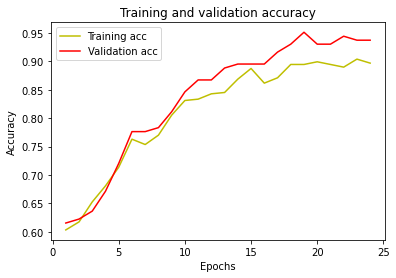

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

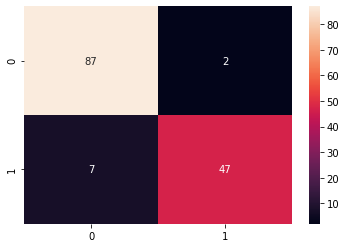

In [21]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [22]:
#Re-train, if necessary. Here we are re-training for extra 50 epochs.
#Since we are continuing the training using same model name (model), no need to save and import the model.
history = model.fit(X_train, y_train, verbose=1, epochs=50, batch_size=64,
                    validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 0s 12ms/step - loss: 0.3286 - accuracy: 0.9014 - val_loss: 0.2885 - val_accuracy: 0.9371
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3391 - accuracy: 0.8920 - val_loss: 0.2839 - val_accuracy: 0.9371
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3268 - accuracy: 0.9108 - val_loss: 0.2797 - val_accuracy: 0.9371
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3213 - accuracy: 0.9085 - val_loss: 0.2757 - val_accuracy: 0.9441
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3244 - accuracy: 0.9038 - val_loss: 0.2709 - val_accuracy: 0.9441
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3182 - accuracy: 0.9061 - val_loss: 0.2666 - val_accuracy: 0.9441
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3087 - accuracy: 0.9085 - val_loss: 0.2628 - val_accuracy: 0.9441
Epoch 8/50
7/7 [=================

**7. Save the model for future use:**  

In [24]:
model.save('saved_model.h5')

**8. Load model (in future) and use it to predict:**  

<AxesSubplot:>

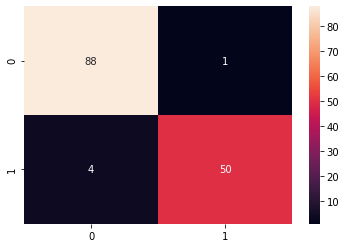

In [25]:
# Here, let us apply the loaded model to predict on our test data.
from keras.models import load_model
my_loaded_model = load_model('saved_model.h5')
y_pred_loaded_model = my_loaded_model.predict(X_test)
y_pred_loaded_model = (y_pred_loaded_model > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_loaded_model)

sns.heatmap(cm, annot=True)